In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

import statsmodels.api as sm

In [2]:
german = pd.read_csv('german_credit.csv')

train_indices, test_indices = train_test_split(np.array(german.index), test_size=0.2, random_state=0)

german_train = german.loc[train_indices].copy()
german_test = german.loc[test_indices].copy() 

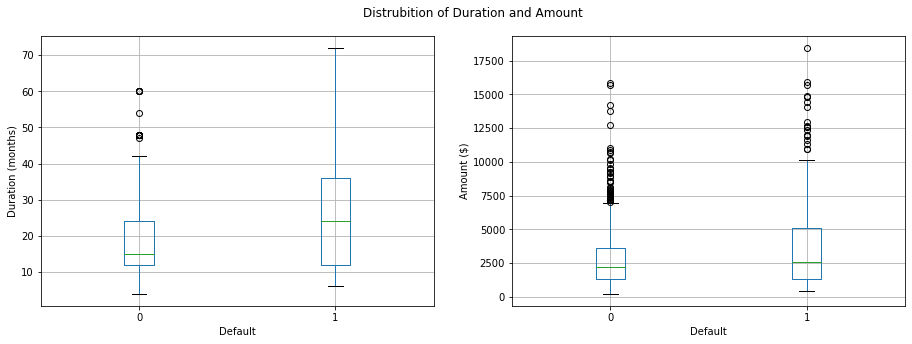

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

german_train.boxplot("duration", "default", ax=axs[0])
axs[0].set_xlabel("Default")
axs[0].set_ylabel("Duration (months)")
axs[0].set_title("")

german_train.boxplot("amount", "default", ax=axs[1])
axs[1].set_xlabel("Default")
axs[1].set_ylabel("Amount ($)")
axs[1].set_title("")

plt.suptitle("Distrubition of Duration and Amount");

In [5]:
axs

array([<AxesSubplot:title={'center':'duration'}, xlabel='default'>,
       <AxesSubplot:>], dtype=object)

In [15]:
german = pd.read_csv('german_credit.csv')

columns = ['default', 'status', 'duration', 'history', 'amount', 'savings', 'housing', 'employment', 'purpose']
german_simplified = german.loc[:, columns].copy()

german_simplified_with_dummies = pd.get_dummies(german_simplified, drop_first=True)

In [16]:
train_indices, test_indices = train_test_split(german_simplified_with_dummies.index, test_size=0.2, random_state=0)

german_train = german_simplified_with_dummies.loc[train_indices].copy()
german_test = german_simplified_with_dummies.loc[test_indices].copy() 

In [22]:
x_train = german_train.drop("default", axis=1)
y_train = german_train.loc[:, "default"]

x_test = german_test.drop("default", axis=1)
y_test = german_test.loc[:, "default"]

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [24]:
model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.459229
         Iterations 7


In [27]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  800
Model:                          Logit   Df Residuals:                      771
Method:                           MLE   Df Model:                           28
Date:                Tue, 22 Mar 2022   Pseudo R-squ.:                  0.2508
Time:                        15:27:26   Log-Likelihood:                -367.38
converged:                       True   LL-Null:                       -490.37
Covariance Type:            nonrobust   LLR p-value:                 1.018e-36
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0562      0.672      1.572      0.116      -0.261       2.373
duration           0.0469      0.010      4.668      0.000       0.027       0.067
amount          6.997e-05    4.3e-05

# Q2

In [36]:
german = pd.read_csv('german_credit.csv')

columns = ['default', 'status', 'duration', 'history', 'amount', 'savings', 'housing', 'employment', 'purpose']
german_simplified = german.loc[:, columns].copy()

german_simplified.head()

,default,status,duration,history,amount,savings,housing,employment,purpose
0,0,A11,6,A34,1169,A65,A152,A75,A43
1,1,A12,48,A32,5951,A61,A152,A73,A43
2,0,A14,12,A34,2096,A61,A152,A74,A46
3,0,A11,42,A32,7882,A61,A153,A74,A42
4,1,A11,24,A33,4870,A61,A153,A73,A40


In [44]:
german_simplified.replace(to_replace=['A32', 'A33'], value='A32/A33', inplace=True)
german_simplified.replace(to_replace=['A40', 'A44', 'A45', 'A49'], value='A40/A44/A45/A49', inplace=True)
german_simplified.replace(to_replace=['A41', 'A48'], value='A41/A48', inplace=True)
german_simplified.replace(to_replace=['A46', 'A410'], value='A46/A410', inplace=True)
german_simplified.replace(to_replace=['A61', 'A62', 'A63', 'A64', 'A65'], 
                          value=['A61/A62']*2 + ['A63/A64/A65']*3, inplace=True)
german_simplified.replace(to_replace=['A74', 'A75'], value='A74/A75', inplace=True)
german_simplified.replace(to_replace=['A151', 'A153'], value='A151/A153', inplace=True)

In [45]:
['A61/A62']*2 + ['A63/A64/A65']*3 

['A61/A62', 'A61/A62', 'A63/A64/A65', 'A63/A64/A65', 'A63/A64/A65']

In [51]:
['A61', 'A62', 'A63', 'A64', 'A65']

['A61', 'A62', 'A63', 'A64', 'A65']

In [53]:
dict(zip(['A61', 'A62', 'A63', 'A64', 'A65'], ['A61/A62']*2 + ['A63/A64/A65']*3))

{'A61': 'A61/A62',
 'A62': 'A61/A62',
 'A63': 'A63/A64/A65',
 'A64': 'A63/A64/A65',
 'A65': 'A63/A64/A65'}

In [54]:
german = pd.read_csv('german_credit.csv')

columns = ['default', 'status', 'duration', 'history', 'amount', 'savings', 'housing', 'employment', 'purpose']
german_simplified = german.loc[:, columns].copy()


german_simplified.replace(to_replace=['A32', 'A33'], value='A32/A33', inplace=True)
german_simplified.replace(to_replace=['A40', 'A44', 'A45', 'A49'], value='A40/A44/A45/A49', inplace=True)
german_simplified.replace(to_replace=['A41', 'A48'], value='A41/A48', inplace=True)
german_simplified.replace(to_replace=['A46', 'A410'], value='A46/A410', inplace=True)
german_simplified.replace(to_replace=['A61', 'A62', 'A63', 'A64', 'A65'], 
                          value=['A61/A62']*2 + ['A63/A64/A65']*3, inplace=True)
german_simplified.replace(to_replace=['A74', 'A75'], value='A74/A75', inplace=True)
german_simplified.replace(to_replace=['A151', 'A153'], value='A151/A153', inplace=True)

In [55]:
german_simplified_with_dummies = pd.get_dummies(german_simplified, drop_first=True)

In [56]:
train_indices, test_indices = train_test_split(german_simplified_with_dummies.index, test_size=0.2, random_state=0)

german_train = german_simplified_with_dummies.loc[train_indices].copy()
german_test = german_simplified_with_dummies.loc[test_indices].copy() 

In [57]:
x_train = german_train.drop("default", axis=1)
y_train = german_train.loc[:, "default"]

x_test = german_test.drop("default", axis=1)
y_test = german_test.loc[:, "default"]

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [58]:
model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.467684
         Iterations 6


In [65]:
y_pred_probability = model.predict(x_test)
y_pred = (y_pred_probability > 0.5).astype(int)

In [68]:
f1_score(y_test, y_pred)

0.485981308411215

In [69]:
y_pred_probability = model.predict(x_test)
y_pred = np.around(y_pred_probability)

In [72]:
print("round(1.5) =", round(1.5))
print("round(2.5) =", round(2.5))
print("round(3.5) =", round(3.5))
print("round(4.5) =", round(4.5))

round(1.5) = 2
round(2.5) = 2
round(3.5) = 4
round(4.5) = 4


In [76]:
round(0.5)

0

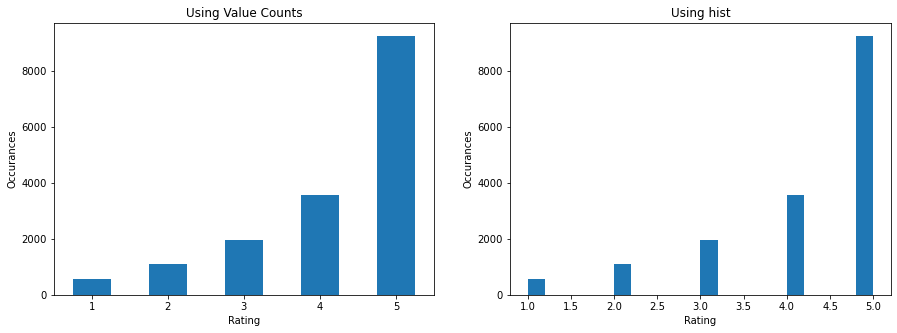

In [82]:
df = pd.read_csv('product_train.csv')

plt.figure(figsize=(15, 5))

ax = plt.subplot(1, 2, 1)
df["Rating"].value_counts().sort_index().plot.bar(ax=ax, rot=0)

ax.set_title("Using Value Counts")
ax.set_xlabel('Rating')
ax.set_ylabel('Occurances')


plt.subplot(1, 2, 2)
plt.hist(df['Rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Occurances')
plt.title("Using hist");

In [83]:
german = pd.read_csv('german_credit.csv')

columns = ['default', 'status', 'duration', 'history', 'amount', 'savings', 'housing', 'employment', 'purpose']
german_simplified = german.loc[:, columns].copy()


german_simplified.replace(to_replace=['A32', 'A33'], value='A32/A33', inplace=True)
german_simplified.replace(to_replace=['A40', 'A44', 'A45', 'A49'], value='A40/A44/A45/A49', inplace=True)
german_simplified.replace(to_replace=['A41', 'A48'], value='A41/A48', inplace=True)
german_simplified.replace(to_replace=['A46', 'A410'], value='A46/A410', inplace=True)
german_simplified.replace(to_replace=['A61', 'A62', 'A63', 'A64', 'A65'], 
                          value=['A61/A62']*2 + ['A63/A64/A65']*3, inplace=True)
german_simplified.replace(to_replace=['A74', 'A75'], value='A74/A75', inplace=True)
german_simplified.replace(to_replace=['A151', 'A153'], value='A151/A153', inplace=True)

In [84]:
german_simplified_with_dummies = pd.get_dummies(german_simplified, drop_first=True)

In [85]:
train_indices, test_indices = train_test_split(german_simplified_with_dummies.index, test_size=0.2, random_state=0)

german_train = german_simplified_with_dummies.loc[train_indices].copy()
german_test = german_simplified_with_dummies.loc[test_indices].copy() 

In [86]:
x_train = german_train.drop("default", axis=1)
y_train = german_train.loc[:, "default"]

x_test = german_test.drop("default", axis=1)
y_test = german_test.loc[:, "default"]

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [87]:
model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.467684
         Iterations 6


In [88]:
y_pred_probability = model.predict(x_test)
y_pred = (y_pred_probability > 1/(1 + 5)).astype(int)

In [89]:
f1_score(y_test, y_pred)

0.5193370165745856

In [93]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).flatten()

In [96]:
loss = (1 * fp + 5 * fn) / len(y_pred)
loss

0.655